In [ ]:
# conda activate CPPmultiverse
# D:\Anaconda\envs\CPPmultiverse\python.exe 1_extract_data.py

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.anova import AnovaRM

In [11]:
data = pd.read_csv( '../Data/results/dfs_resp_fc.csv',sep=',')
data['rt'] = data['rt']+0.2

In [15]:
# ANOVA for non-hierarchical
model_aovrm3way = AnovaRM(data,
                   'rt',
                   'subj_idx',
                   within=['coherence','prioritized','stim'],
                   aggregate_func='mean')
res3way=model_aovrm3way.fit()
print(res3way)
# ANOVA for response
model_aovrm3way = AnovaRM(data,
                   'correct',
                   'subj_idx',
                   within=['coherence','prioritized','stim'],
                   aggregate_func='mean')
res3way=model_aovrm3way.fit()
print(res3way)

                         Anova
                           F Value Num DF  Den DF Pr > F
--------------------------------------------------------
coherence                  45.4846 1.0000 15.0000 0.0000
prioritized                11.9133 1.0000 15.0000 0.0036
stim                        2.4667 1.0000 15.0000 0.1371
coherence:prioritized       1.1109 1.0000 15.0000 0.3086
coherence:stim              1.5755 1.0000 15.0000 0.2286
prioritized:stim            0.7214 1.0000 15.0000 0.4090
coherence:prioritized:stim  1.7689 1.0000 15.0000 0.2034

                         Anova
                           F Value Num DF  Den DF Pr > F
--------------------------------------------------------
coherence                  38.2293 1.0000 15.0000 0.0000
prioritized                 5.1692 1.0000 15.0000 0.0381
stim                        3.1936 1.0000 15.0000 0.0941
coherence:prioritized       0.7006 1.0000 15.0000 0.4157
coherence:stim              0.6157 1.0000 15.0000 0.4449
prioritized:stim         

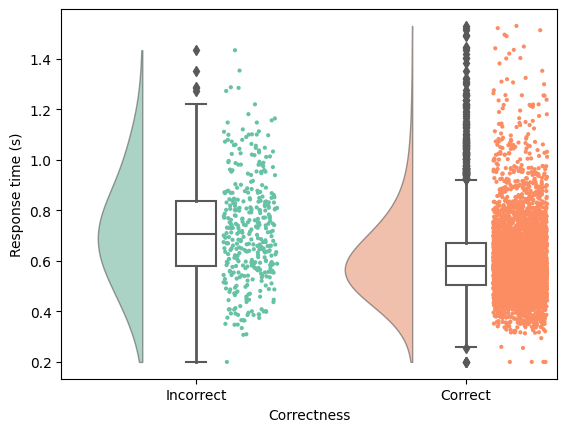

In [22]:
pt.RainCloud(x = 'correct', 
                  y = 'rt', 
                  data = data, 
                  palette = 'Set2', 
                  bw = 0.6, 
                  width_viol=.5,
                  orient = 'v', 
                  alpha = .6, 
                  dodge = True,  
                  move = 0.2,
                  )
plt.ylabel('Response time (s)')
plt.xlabel('Correctness')
plt.xticks([0,1],['Incorrect','Correct'])
plt.savefig('../Figure/behdata_rc_correct.pdf',dpi=1000)

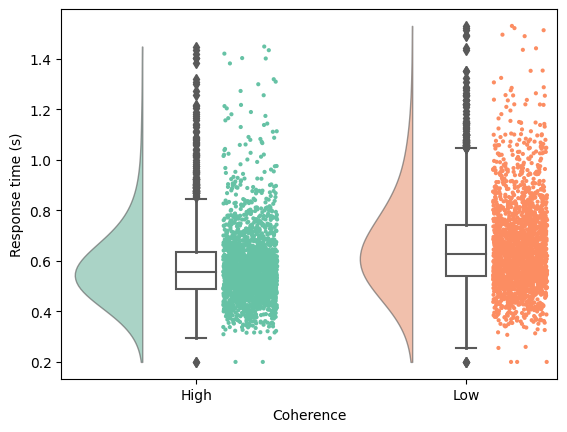

In [24]:
pt.RainCloud(x = 'coherence', 
                  y = 'rt', 
                  data = data, 
                  palette = 'Set2', 
                  bw = 0.6, 
                  width_viol=.5,
                  orient = 'v', 
                  alpha = .6, 
                  dodge = True,  
                  move = 0.2,
                  )
plt.ylabel('Response time (s)')
plt.xlabel('Coherence')
plt.xticks([0,1],['High','Low'])
plt.savefig('../Figure/behdata_rc_coherence.pdf',dpi=1000)

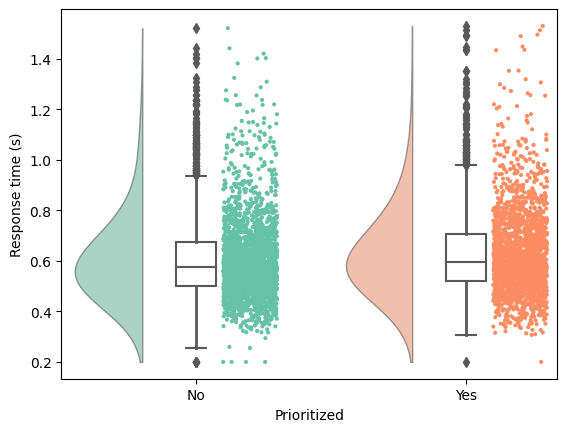

In [25]:
pt.RainCloud(x = 'prioritized', 
                  y = 'rt', 
                  data = data, 
                  palette = 'Set2', 
                  bw = 0.6, 
                  width_viol=.5,
                  orient = 'v', 
                  alpha = .6, 
                  dodge = True,  
                  move = 0.2,
                  )
plt.ylabel('Response time (s)')
plt.xlabel('Prioritized')
plt.xticks([0,1],['No','Yes'])
plt.savefig('../Figure/behdata_rc_prioritized.pdf',dpi=1000)

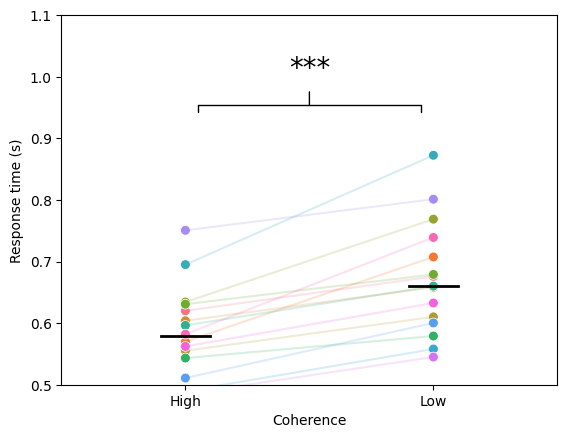

In [119]:
df = data.groupby(['coherence','subj_idx']).rt.mean().reset_index()
# 
sns.lineplot(x='coherence', 
             y='rt', 
             hue='subj_idx', 
             data=df, 
             alpha=0.2,
             legend=False)
sns.scatterplot(x='coherence', 
                y='rt', 
                hue='subj_idx', 
                marker='o', 
                s=50, 
                data=df, 
                legend=False)

plt.axhline(df.loc[df['coherence']=='high','rt'].mean(), 
            color='black', 
            linestyle='-',
            linewidth=2,
            xmin=0.2,
            xmax=0.3)
plt.axhline(df.loc[df['coherence']=='low','rt'].mean(), 
            color='black', 
            linestyle='-',
            linewidth=2,
            xmin=0.7,
            xmax=0.8)

plt.ylabel('Response time (s)')
plt.xlabel('Coherence')
plt.xticks([0,1],['High','Low'])
plt.xlim([-0.5,1.5])
plt.ylim([0.5,1.1])

plt.text(0.5, 1, '***', fontsize=20, ha='center')
plt.annotate('', xy=(0.5, 0.75), 
             xytext=(0.5, 0.8), 
             xycoords='axes fraction',
                arrowprops=dict(arrowstyle='-[, widthB=8, lengthB=.5', 
                                lw=1))
plt.savefig('../Figure/behdata_rt_coherence.pdf',dpi=1000)

C:\Users\liuyikang\AppData\Local\Temp\ipykernel_12128\3849511397.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(['coherence','subj_idx']).mean().reset_index()


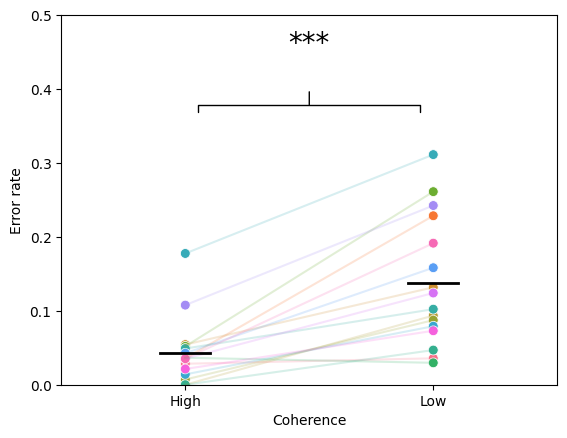

In [122]:
df = data.groupby(['coherence','subj_idx']).mean().reset_index()

df['error_rate'] = 1- df['correct']
sns.lineplot(x='coherence', 
             y='error_rate', 
             hue='subj_idx', 
             data=df, 
             alpha=0.2,
             legend=False)
sns.scatterplot(x='coherence', 
                y='error_rate', 
                hue='subj_idx', 
                marker='o', 
                s=50, 
                data=df, 
                legend=False)
plt.axhline(df.loc[df['coherence']=='high','error_rate'].mean(), 
            color='black', 
            linestyle='-',
            linewidth=2,
            xmin=0.2,
            xmax=0.3)
plt.axhline(df.loc[df['coherence']=='low','error_rate'].mean(), 
            color='black', 
            linestyle='-',
            linewidth=2,
            xmin=0.7,
            xmax=0.8)
plt.ylabel('Error rate')
plt.xlabel('Coherence')
plt.xticks([0,1],['High','Low'])
plt.xlim([-0.5,1.5])
plt.ylim([0,0.5])
plt.text(0.5, 0.45, '***', fontsize=20, ha='center')
plt.annotate('', xy=(0.5, 0.75), 
             xytext=(0.5, 0.8), 
             xycoords='axes fraction',
                arrowprops=dict(arrowstyle='-[, widthB=8, lengthB=.5', 
                                lw=1))

plt.savefig('../Figure/behdata_acc_coherence.pdf',dpi=1000)